# K-means

Statistics for Optimized Dataset :
              Run  Execution Time (seconds)
count  500.000000                500.000000
mean   250.500000                  0.010065
std    144.481833                  0.001159
min      1.000000                  0.006434
25%    125.750000                  0.009256
50%    250.500000                  0.010093
75%    375.250000                  0.010768
max    500.000000                  0.016158

Statistics for Source Dataset :
              Run  Execution Time (seconds)
count  500.000000                500.000000
mean   250.500000                  0.011595
std    144.481833                  0.001413
min      1.000000                  0.008582
25%    125.750000                  0.010657
50%    250.500000                  0.011487
75%    375.250000                  0.012322
max    500.000000                  0.024325


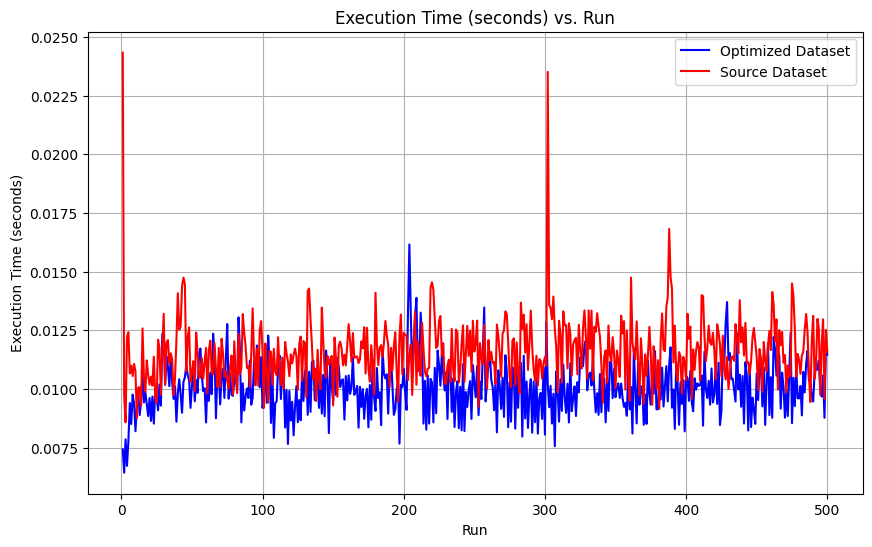

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the first dataset
optimized_dataset = pd.read_csv("/mnt/c/Users/Asus/Desktop/CSE425/Project/Enhanced-IR-Code-for-Compilation-Efficiency-with-LLVM-Clang/K-means/optimized/execution_times.csv")
dataset1 = optimized_dataset  # Create a copy of the original dataset

# Load the second dataset
source_dataset = pd.read_csv("/mnt/c/Users/Asus/Desktop/CSE425/Project/Enhanced-IR-Code-for-Compilation-Efficiency-with-LLVM-Clang/K-means/source/execution_times.csv")
dataset2 = source_dataset  # Create a copy of the original dataset

# Sort both datasets by "User Time"
# dataset1 = dataset1.sort_values(by="Execution Time (seconds)")
# dataset2 = dataset2.sort_values(by="Execution Time (seconds)")

# Print the compared details
print("Statistics for Optimized Dataset :")
print(dataset1.describe())
print("\nStatistics for Source Dataset :")
print(dataset2.describe())

# Create a line chart to compare the two datasets with x and y axes swapped
plt.figure(figsize=(10, 6))

# Plot data from dataset1 with x and y swapped
plt.plot(dataset1['Run'], dataset1['Execution Time (seconds)'], label='Optimized Dataset', color='blue')

# Plot data from dataset2 with x and y swapped
plt.plot(dataset2['Run'], dataset2['Execution Time (seconds)'], label='Source Dataset', color='red')

plt.xlabel('Run')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time (seconds) vs. Run')
plt.legend()
plt.grid(True)
plt.show()


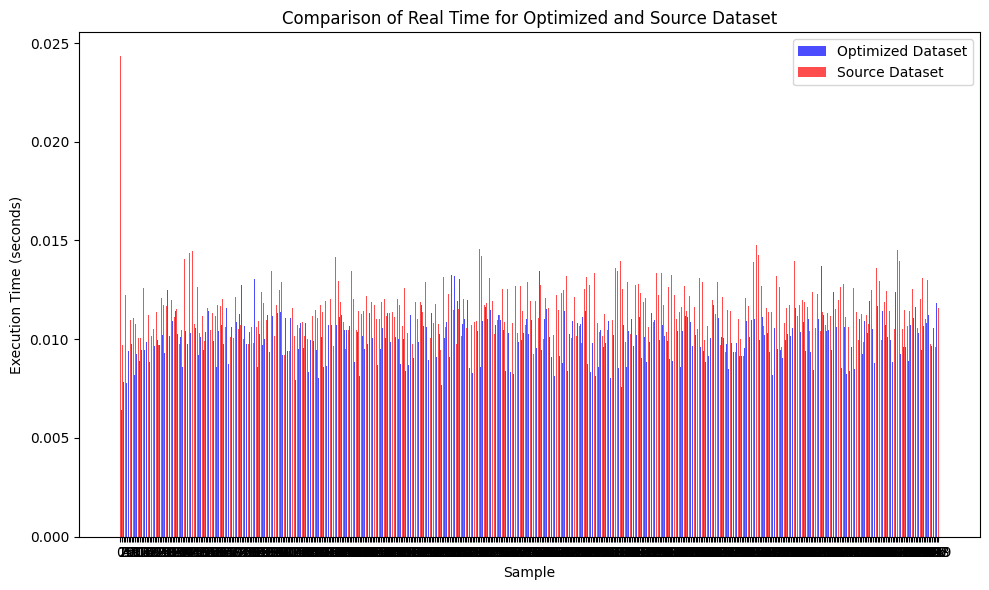

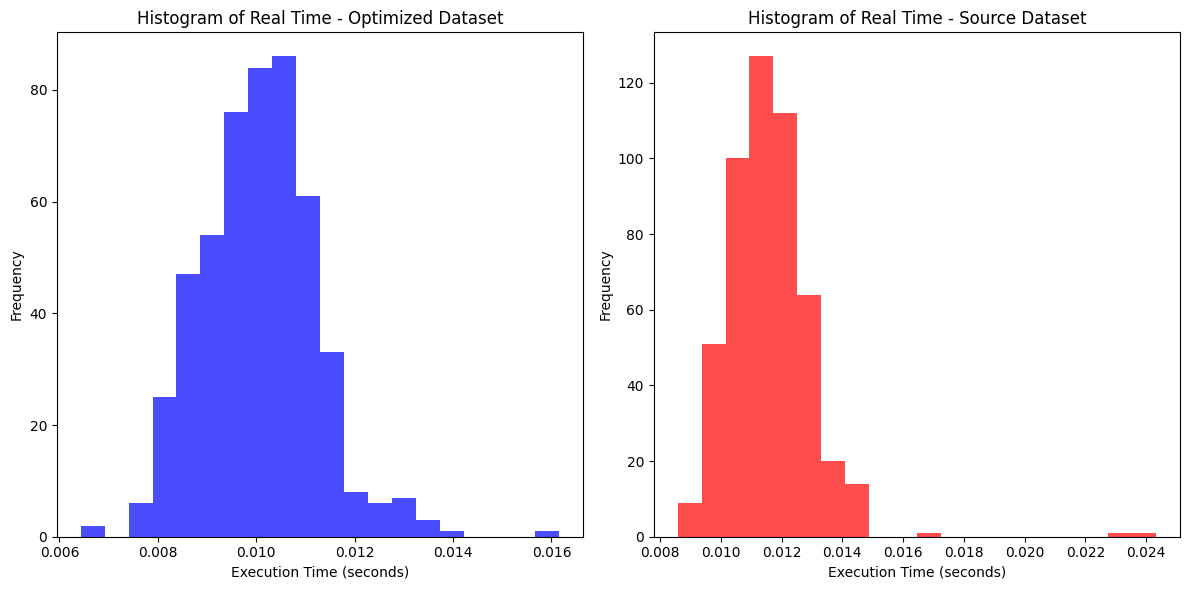

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the first dataset
optimized_dataset = pd.read_csv("/mnt/c/Users/Asus/Desktop/CSE425/Project/Enhanced-IR-Code-for-Compilation-Efficiency-with-LLVM-Clang/K-means/optimized/execution_times.csv")
dataset1 = optimized_dataset  # Create a copy of the original dataset

# Load the second dataset
source_dataset = pd.read_csv("/mnt/c/Users/Asus/Desktop/CSE425/Project/Enhanced-IR-Code-for-Compilation-Efficiency-with-LLVM-Clang/K-means/source/execution_times.csv")
dataset2 = source_dataset  # Create a copy of the original dataset

# Assuming both datasets have columns "Real Time," "User Time," and "Sys Time"

# Create a side-by-side bar chart for comparison
plt.figure(figsize=(10, 6))

# Bar width and positions for the two datasets
bar_width = 0.35
index = range(len(dataset1))

plt.bar(index, dataset1['Execution Time (seconds)'], bar_width, label='Optimized Dataset', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in index], dataset2['Execution Time (seconds)'], bar_width, label='Source Dataset', color='red', alpha=0.7)

plt.xlabel('Sample')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Real Time for Optimized and Source Dataset')
plt.xticks([i + bar_width/2 for i in index], index)
plt.legend()
plt.tight_layout()

plt.show()

# Create histograms for each dataset
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dataset1['Execution Time (seconds)'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Real Time - Optimized Dataset')

plt.subplot(1, 2, 2)
plt.hist(dataset2['Execution Time (seconds)'], bins=20, color='red', alpha=0.7)
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Real Time - Source Dataset')

plt.tight_layout()
plt.show()


/tmp/ipykernel_4843/3856442419.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Dataset", y=feature, data=pd.concat([dataset1.assign(Dataset="Optimized"), dataset2.assign(Dataset="Source")]), palette="viridis")


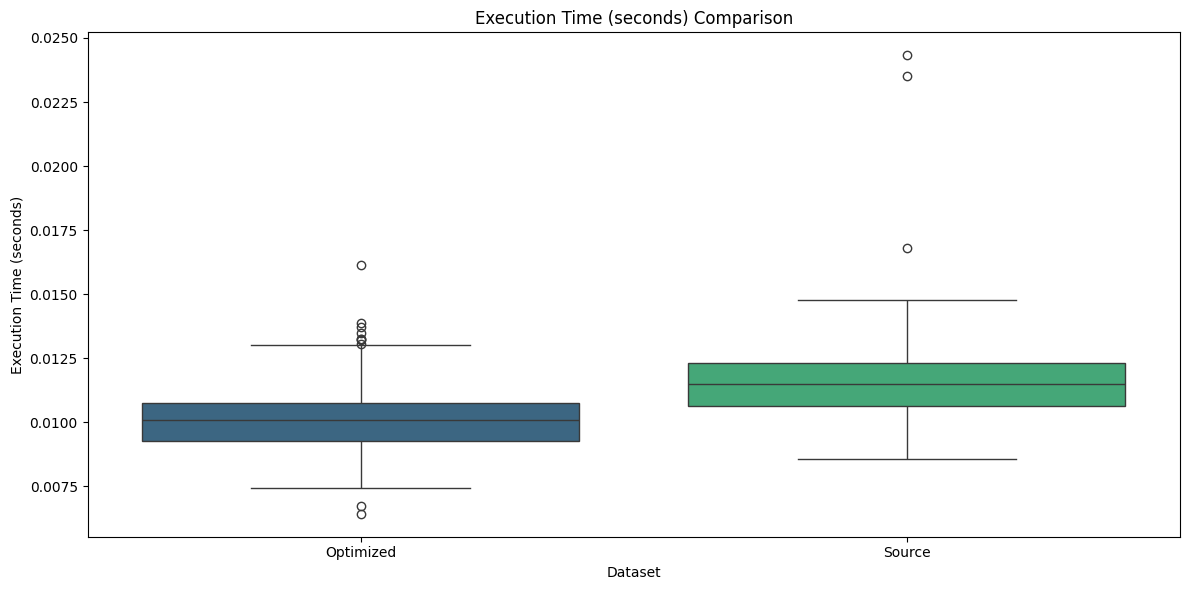

Optimized Dataset has better performance/accuracy.


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the first dataset
optimized_dataset = pd.read_csv("/mnt/c/Users/Asus/Desktop/CSE425/Project/Enhanced-IR-Code-for-Compilation-Efficiency-with-LLVM-Clang/K-means/optimized/execution_times.csv")
dataset1 = optimized_dataset  # Create a copy of the original dataset

# Load the second dataset
source_dataset = pd.read_csv("/mnt/c/Users/Asus/Desktop/CSE425/Project/Enhanced-IR-Code-for-Compilation-Efficiency-with-LLVM-Clang/K-means/source/execution_times.csv")
dataset2 = source_dataset  # Create a copy of the original dataset

# Define features and target variable
features = ["Execution Time (seconds)"]

# Calculate the performance scores for each dataset
dataset1["Performance Score"] = dataset1[features].sum(axis=1)
dataset2["Performance Score"] = dataset2[features].sum(axis=1)

# Compare performance scores
mean_performance_1 = dataset1["Performance Score"].mean()
mean_performance_2 = dataset2["Performance Score"].mean()

# Create a box plot to visualize performance score distributions
# plt.figure(figsize=(10, 6))
# sns.boxplot(x="Dataset", y="Performance Score", data=pd.concat([dataset1.assign(Dataset="Optimized"), dataset2.assign(Dataset="Source")]), palette="viridis")
# plt.title("Performance Score Comparison (Optimized vs. Source)")
# plt.show()

# Create box plots for individual attributes
plt.figure(figsize=(12, 6))
for feature in features:
    plt.subplot(1, len(features), features.index(feature) + 1)
    sns.boxplot(x="Dataset", y=feature, data=pd.concat([dataset1.assign(Dataset="Optimized"), dataset2.assign(Dataset="Source")]), palette="viridis")
    plt.title(f"{feature} Comparison")

plt.tight_layout()
plt.show()

# Define the tolerance for mean comparison
tolerance = 1e-10

if np.isclose(mean_performance_1, mean_performance_2, rtol=tolerance):
    print("Both datasets have similar performance/accuracy.")
elif mean_performance_1 < mean_performance_2:
    print("Optimized Dataset has better performance/accuracy.")
else:
    print("Source Dataset has better performance/accuracy.")


# KNN

Statistics for Optimized Dataset :
              Run  Execution Time (seconds)
count  500.000000                500.000000
mean   250.500000                  0.009779
std    144.481833                  0.001104
min      1.000000                  0.006851
25%    125.750000                  0.009057
50%    250.500000                  0.009753
75%    375.250000                  0.010378
max    500.000000                  0.015057

Statistics for Source Dataset :
              Run  Execution Time (seconds)
count  500.000000                500.000000
mean   250.500000                  0.010868
std    144.481833                  0.001196
min      1.000000                  0.007845
25%    125.750000                  0.010041
50%    250.500000                  0.010663
75%    375.250000                  0.011571
max    500.000000                  0.016204


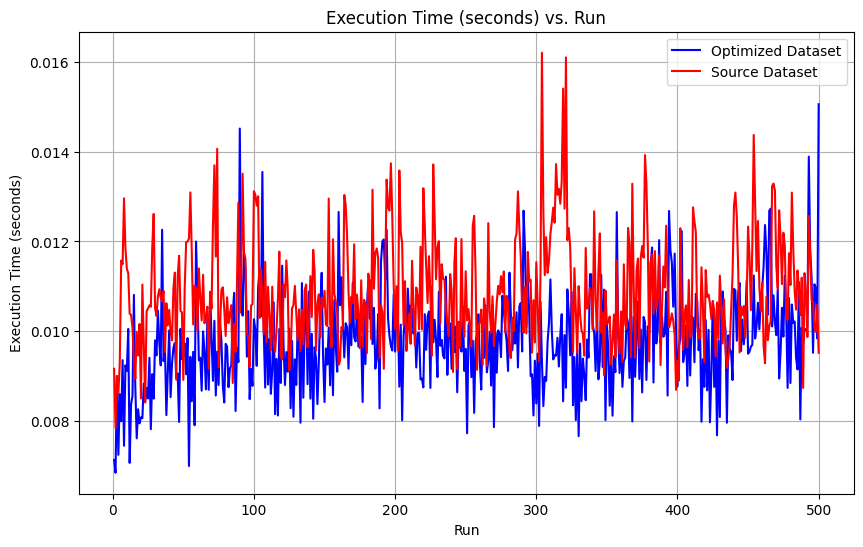

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the first dataset
optimized_dataset = pd.read_csv("/mnt/c/Users/Asus/Desktop/CSE425/Project/Enhanced-IR-Code-for-Compilation-Efficiency-with-LLVM-Clang/KNN/optimized/execution_times.csv")
dataset1 = optimized_dataset  # Create a copy of the original dataset

# Load the second dataset
source_dataset = pd.read_csv("/mnt/c/Users/Asus/Desktop/CSE425/Project/Enhanced-IR-Code-for-Compilation-Efficiency-with-LLVM-Clang/KNN/source/execution_times.csv")
dataset2 = source_dataset  # Create a copy of the original dataset

# Sort both datasets by "User Time"
# dataset1 = dataset1.sort_values(by="Execution Time (seconds)")
# dataset2 = dataset2.sort_values(by="Execution Time (seconds)")

# Print the compared details
print("Statistics for Optimized Dataset :")
print(dataset1.describe())
print("\nStatistics for Source Dataset :")
print(dataset2.describe())

# Create a line chart to compare the two datasets with x and y axes swapped
plt.figure(figsize=(10, 6))

# Plot data from dataset1 with x and y swapped
plt.plot(dataset1['Run'], dataset1['Execution Time (seconds)'], label='Optimized Dataset', color='blue')

# Plot data from dataset2 with x and y swapped
plt.plot(dataset2['Run'], dataset2['Execution Time (seconds)'], label='Source Dataset', color='red')

plt.xlabel('Run')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time (seconds) vs. Run')
plt.legend()
plt.grid(True)
plt.show()

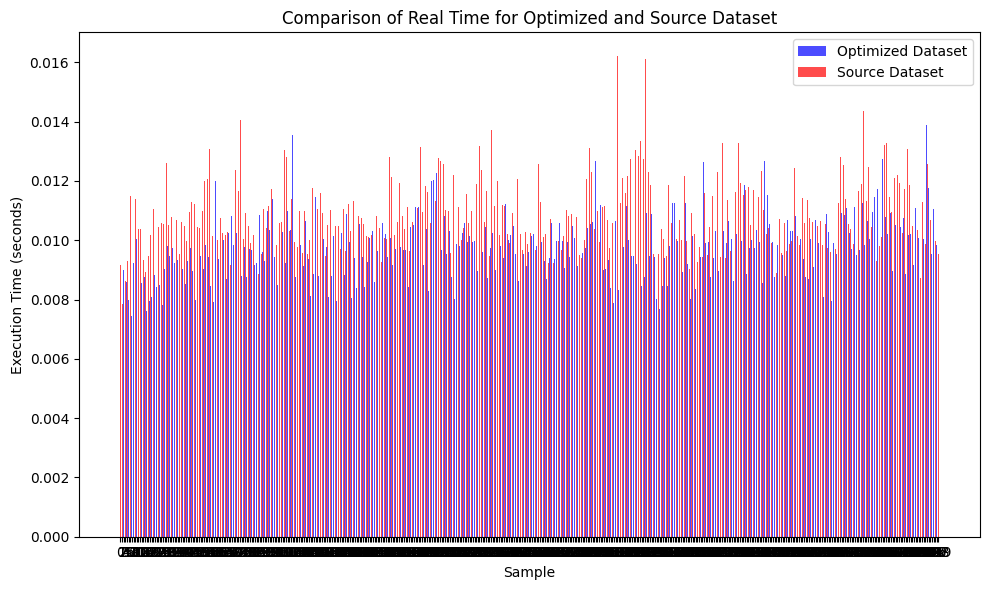

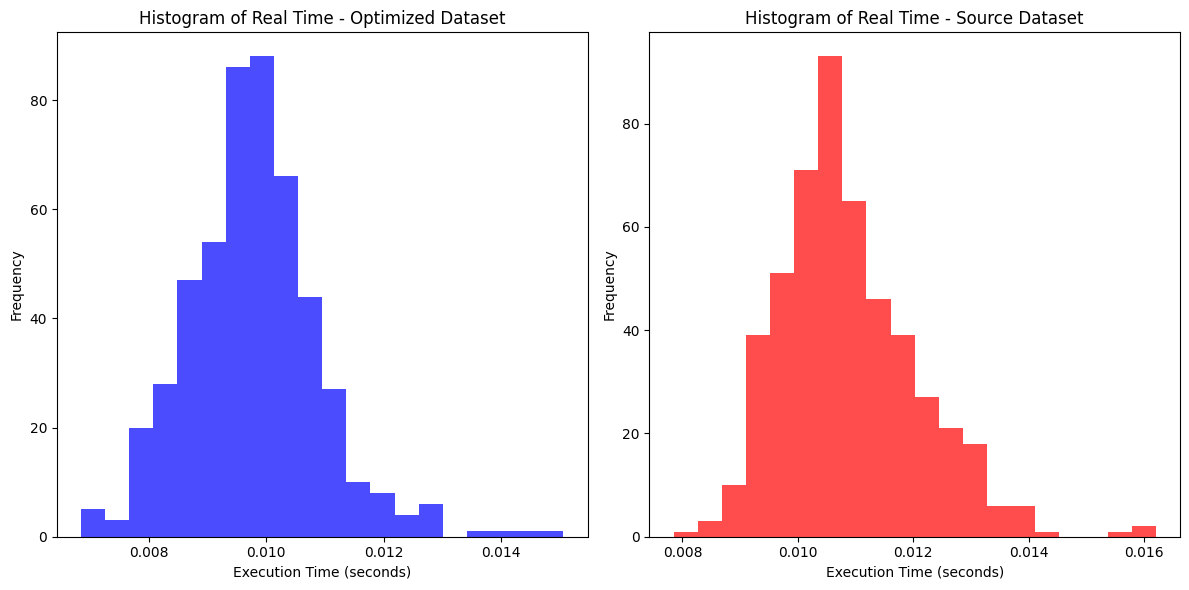

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the first dataset
optimized_dataset = pd.read_csv("/mnt/c/Users/Asus/Desktop/CSE425/Project/Enhanced-IR-Code-for-Compilation-Efficiency-with-LLVM-Clang/KNN/optimized/execution_times.csv")
dataset1 = optimized_dataset  # Create a copy of the original dataset

# Load the second dataset
source_dataset = pd.read_csv("/mnt/c/Users/Asus/Desktop/CSE425/Project/Enhanced-IR-Code-for-Compilation-Efficiency-with-LLVM-Clang/KNN/source/execution_times.csv")
dataset2 = source_dataset  # Create a copy of the original dataset

# Assuming both datasets have columns "Real Time," "User Time," and "Sys Time"

# Create a side-by-side bar chart for comparison
plt.figure(figsize=(10, 6))

# Bar width and positions for the two datasets
bar_width = 0.35
index = range(len(dataset1))

plt.bar(index, dataset1['Execution Time (seconds)'], bar_width, label='Optimized Dataset', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in index], dataset2['Execution Time (seconds)'], bar_width, label='Source Dataset', color='red', alpha=0.7)

plt.xlabel('Sample')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Real Time for Optimized and Source Dataset')
plt.xticks([i + bar_width/2 for i in index], index)
plt.legend()
plt.tight_layout()

plt.show()

# Create histograms for each dataset
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dataset1['Execution Time (seconds)'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Real Time - Optimized Dataset')

plt.subplot(1, 2, 2)
plt.hist(dataset2['Execution Time (seconds)'], bins=20, color='red', alpha=0.7)
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Real Time - Source Dataset')

plt.tight_layout()
plt.show()


/tmp/ipykernel_4843/1888575801.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Dataset", y=feature, data=pd.concat([dataset1.assign(Dataset="Optimized"), dataset2.assign(Dataset="Source")]), palette="viridis")


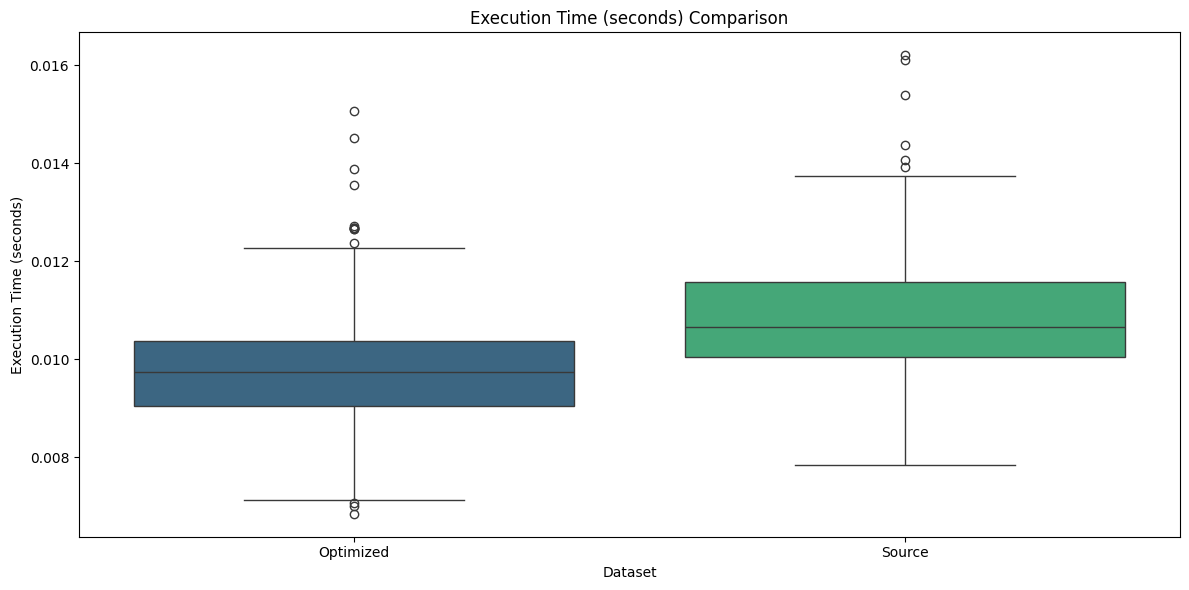

Optimized Dataset has better performance/accuracy.


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the first dataset
optimized_dataset = pd.read_csv("/mnt/c/Users/Asus/Desktop/CSE425/Project/Enhanced-IR-Code-for-Compilation-Efficiency-with-LLVM-Clang/KNN/optimized/execution_times.csv")
dataset1 = optimized_dataset  # Create a copy of the original dataset

# Load the second dataset
source_dataset = pd.read_csv("/mnt/c/Users/Asus/Desktop/CSE425/Project/Enhanced-IR-Code-for-Compilation-Efficiency-with-LLVM-Clang/KNN/source/execution_times.csv")
dataset2 = source_dataset  # Create a copy of the original dataset

# Define features and target variable
features = ["Execution Time (seconds)"]

# Calculate the performance scores for each dataset
dataset1["Performance Score"] = dataset1[features].sum(axis=1)
dataset2["Performance Score"] = dataset2[features].sum(axis=1)

# Compare performance scores
mean_performance_1 = dataset1["Performance Score"].mean()
mean_performance_2 = dataset2["Performance Score"].mean()

# Create a box plot to visualize performance score distributions
# plt.figure(figsize=(10, 6))
# sns.boxplot(x="Dataset", y="Performance Score", data=pd.concat([dataset1.assign(Dataset="Optimized"), dataset2.assign(Dataset="Source")]), palette="viridis")
# plt.title("Performance Score Comparison (Optimized vs. Source)")
# plt.show()

# Create box plots for individual attributes
plt.figure(figsize=(12, 6))
for feature in features:
    plt.subplot(1, len(features), features.index(feature) + 1)
    sns.boxplot(x="Dataset", y=feature, data=pd.concat([dataset1.assign(Dataset="Optimized"), dataset2.assign(Dataset="Source")]), palette="viridis")
    plt.title(f"{feature} Comparison")

plt.tight_layout()
plt.show()

# Define the tolerance for mean comparison
tolerance = 1e-10

if np.isclose(mean_performance_1, mean_performance_2, rtol=tolerance):
    print("Both datasets have similar performance/accuracy.")
elif mean_performance_1 < mean_performance_2:
    print("Optimized Dataset has better performance/accuracy.")
else:
    print("Source Dataset has better performance/accuracy.")


# SVM

Statistics for Optimized Dataset :
              Run  Execution Time (seconds)
count  500.000000                500.000000
mean   250.500000                  0.010567
std    144.481833                  0.001099
min      1.000000                  0.007074
25%    125.750000                  0.009864
50%    250.500000                  0.010387
75%    375.250000                  0.011141
max    500.000000                  0.016760

Statistics for Source Dataset :
              Run  Execution Time (seconds)
count  500.000000                500.000000
mean   250.500000                  0.015189
std    144.481833                  0.006045
min      1.000000                  0.010393
25%    125.750000                  0.013521
50%    250.500000                  0.014348
75%    375.250000                  0.015438
max    500.000000                  0.119112


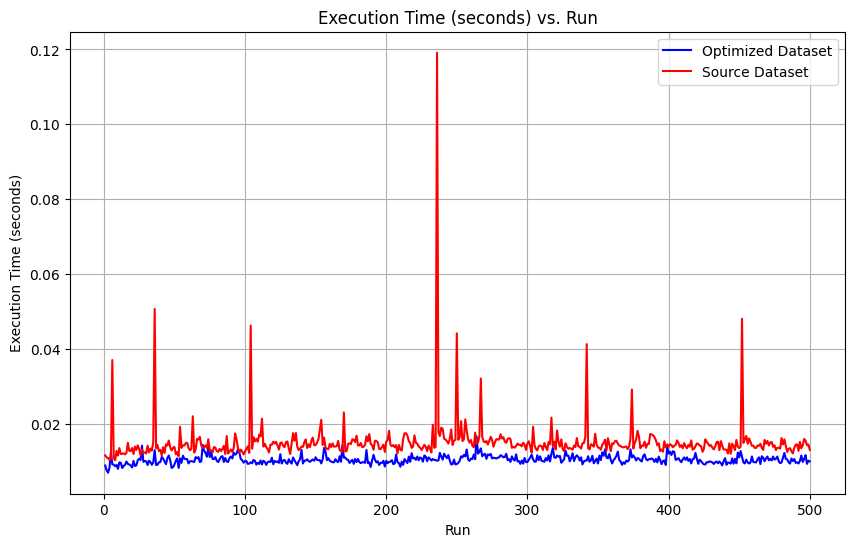

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the first dataset
optimized_dataset = pd.read_csv("/mnt/c/Users/Asus/Desktop/CSE425/Project/Enhanced-IR-Code-for-Compilation-Efficiency-with-LLVM-Clang/SVM/optimized/execution_times.csv")
dataset1 = optimized_dataset  # Create a copy of the original dataset

# Load the second dataset
source_dataset = pd.read_csv("/mnt/c/Users/Asus/Desktop/CSE425/Project/Enhanced-IR-Code-for-Compilation-Efficiency-with-LLVM-Clang/SVM/source/execution_times.csv")
dataset2 = source_dataset  # Create a copy of the original dataset

# Sort both datasets by "User Time"
# dataset1 = dataset1.sort_values(by="Execution Time (seconds)")
# dataset2 = dataset2.sort_values(by="Execution Time (seconds)")

# Print the compared details
print("Statistics for Optimized Dataset :")
print(dataset1.describe())
print("\nStatistics for Source Dataset :")
print(dataset2.describe())

# Create a line chart to compare the two datasets with x and y axes swapped
plt.figure(figsize=(10, 6))

# Plot data from dataset1 with x and y swapped
plt.plot(dataset1['Run'], dataset1['Execution Time (seconds)'], label='Optimized Dataset', color='blue')

# Plot data from dataset2 with x and y swapped
plt.plot(dataset2['Run'], dataset2['Execution Time (seconds)'], label='Source Dataset', color='red')

plt.xlabel('Run')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time (seconds) vs. Run')
plt.legend()
plt.grid(True)
plt.show()

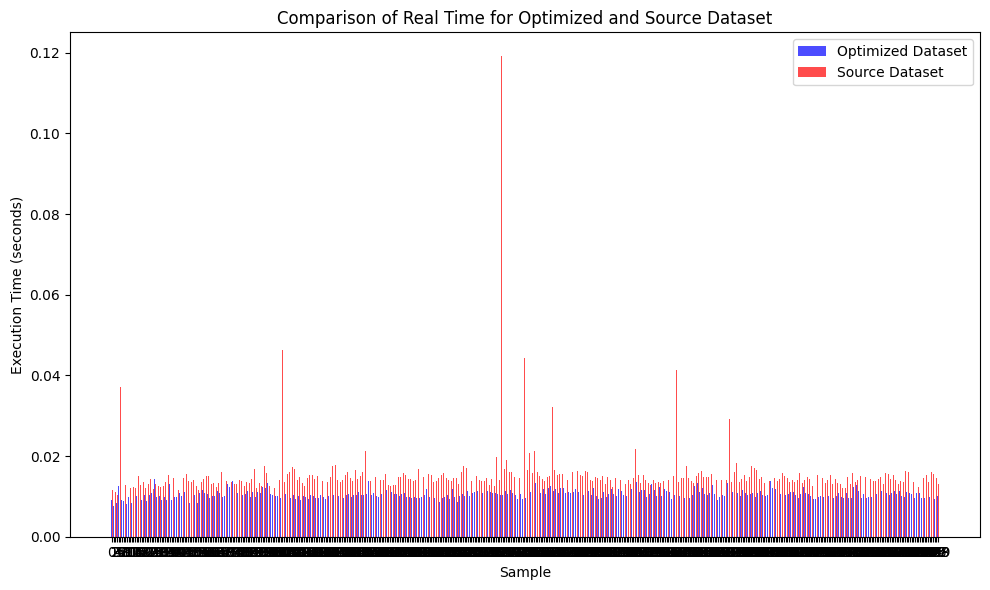

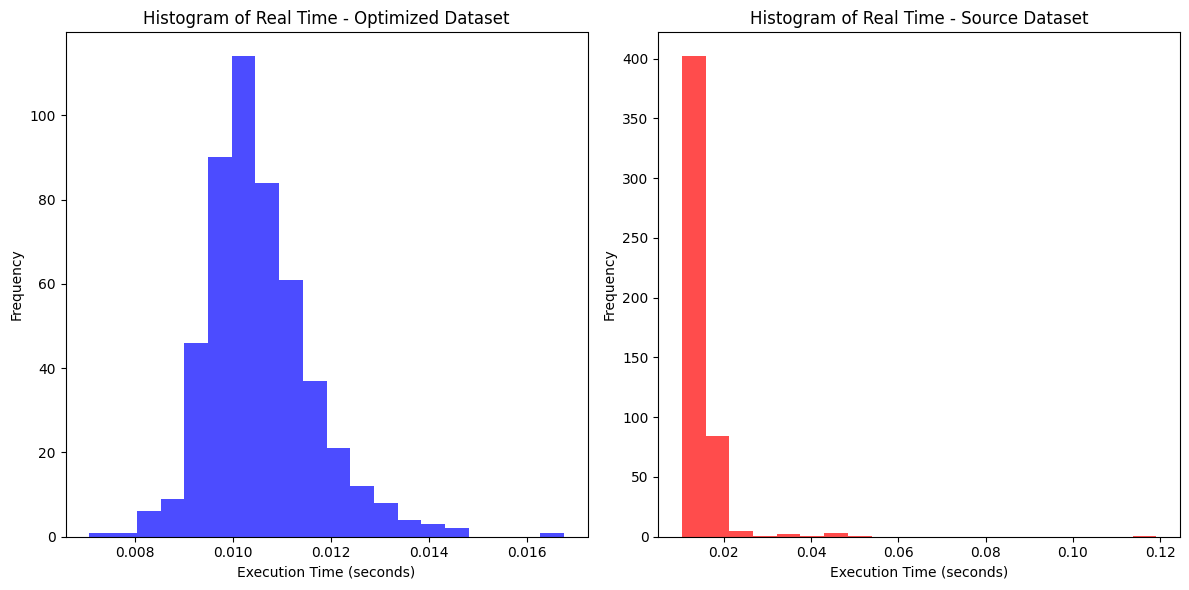

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the first dataset
optimized_dataset = pd.read_csv("/mnt/c/Users/Asus/Desktop/CSE425/Project/Enhanced-IR-Code-for-Compilation-Efficiency-with-LLVM-Clang/SVM/optimized/execution_times.csv")
dataset1 = optimized_dataset  # Create a copy of the original dataset

# Load the second dataset
source_dataset = pd.read_csv("/mnt/c/Users/Asus/Desktop/CSE425/Project/Enhanced-IR-Code-for-Compilation-Efficiency-with-LLVM-Clang/SVM/source/execution_times.csv")
dataset2 = source_dataset  # Create a copy of the original dataset

# Assuming both datasets have columns "Real Time," "User Time," and "Sys Time"

# Create a side-by-side bar chart for comparison
plt.figure(figsize=(10, 6))

# Bar width and positions for the two datasets
bar_width = 0.35
index = range(len(dataset1))

plt.bar(index, dataset1['Execution Time (seconds)'], bar_width, label='Optimized Dataset', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in index], dataset2['Execution Time (seconds)'], bar_width, label='Source Dataset', color='red', alpha=0.7)

plt.xlabel('Sample')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Real Time for Optimized and Source Dataset')
plt.xticks([i + bar_width/2 for i in index], index)
plt.legend()
plt.tight_layout()

plt.show()

# Create histograms for each dataset
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dataset1['Execution Time (seconds)'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Real Time - Optimized Dataset')

plt.subplot(1, 2, 2)
plt.hist(dataset2['Execution Time (seconds)'], bins=20, color='red', alpha=0.7)
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Real Time - Source Dataset')

plt.tight_layout()
plt.show()


/tmp/ipykernel_4843/3588420164.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Dataset", y=feature, data=pd.concat([dataset1.assign(Dataset="Optimized"), dataset2.assign(Dataset="Source")]), palette="viridis")


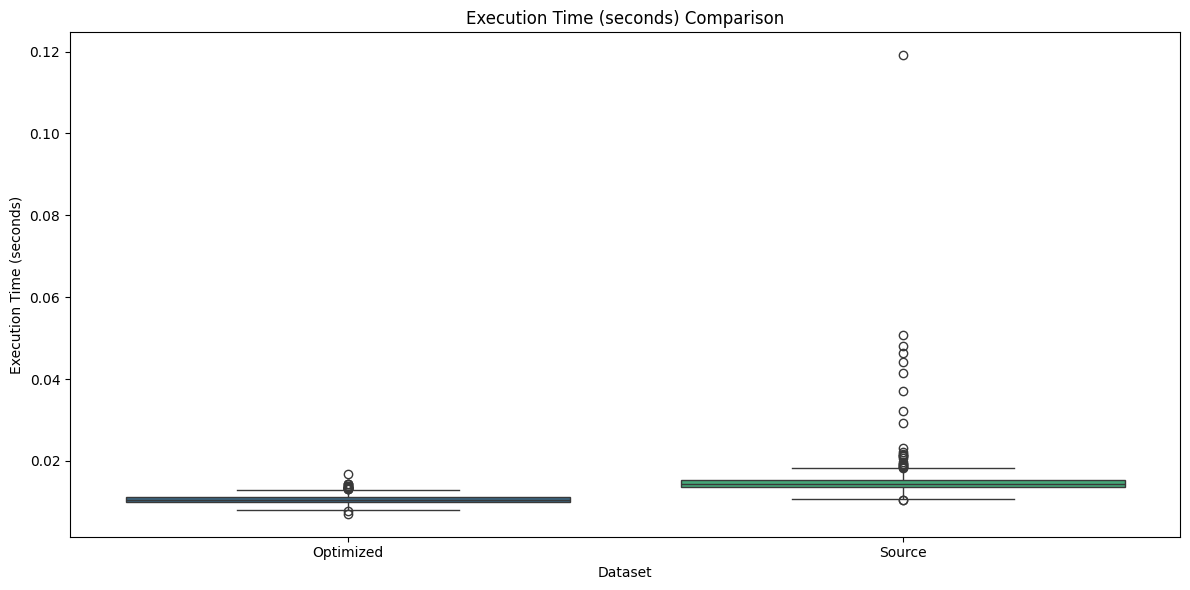

Optimized Dataset has better performance/accuracy.


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the first dataset
optimized_dataset = pd.read_csv("/mnt/c/Users/Asus/Desktop/CSE425/Project/Enhanced-IR-Code-for-Compilation-Efficiency-with-LLVM-Clang/SVM/optimized/execution_times.csv")
dataset1 = optimized_dataset  # Create a copy of the original dataset

# Load the second dataset
source_dataset = pd.read_csv("/mnt/c/Users/Asus/Desktop/CSE425/Project/Enhanced-IR-Code-for-Compilation-Efficiency-with-LLVM-Clang/SVM/source/execution_times.csv")
dataset2 = source_dataset  # Create a copy of the original dataset

# Define features and target variable
features = ["Execution Time (seconds)"]

# Calculate the performance scores for each dataset
dataset1["Performance Score"] = dataset1[features].sum(axis=1)
dataset2["Performance Score"] = dataset2[features].sum(axis=1)

# Compare performance scores
mean_performance_1 = dataset1["Performance Score"].mean()
mean_performance_2 = dataset2["Performance Score"].mean()

# Create a box plot to visualize performance score distributions
# plt.figure(figsize=(10, 6))
# sns.boxplot(x="Dataset", y="Performance Score", data=pd.concat([dataset1.assign(Dataset="Optimized"), dataset2.assign(Dataset="Source")]), palette="viridis")
# plt.title("Performance Score Comparison (Optimized vs. Source)")
# plt.show()

# Create box plots for individual attributes
plt.figure(figsize=(12, 6))
for feature in features:
    plt.subplot(1, len(features), features.index(feature) + 1)
    sns.boxplot(x="Dataset", y=feature, data=pd.concat([dataset1.assign(Dataset="Optimized"), dataset2.assign(Dataset="Source")]), palette="viridis")
    plt.title(f"{feature} Comparison")

plt.tight_layout()
plt.show()

# Define the tolerance for mean comparison
tolerance = 1e-10

if np.isclose(mean_performance_1, mean_performance_2, rtol=tolerance):
    print("Both datasets have similar performance/accuracy.")
elif mean_performance_1 < mean_performance_2:
    print("Optimized Dataset has better performance/accuracy.")
else:
    print("Source Dataset has better performance/accuracy.")
